# **Sistema de control dinámico en lazo cerrado.**

1. Función de Transferencia del Sistema
Consideraremos un sistema que puede ser representado por la siguiente función de transferencia de primer orden:

𝐺
(
𝑠
)
=
𝐾
𝜏
𝑠
+
1
G(s)=
τs+1
K
​


donde:

𝐾
K es la ganancia del sistema.
𝜏
τ es la constante de tiempo del sistema.
2. Controlador PID
El controlador PID puede ser descrito por:

𝐶
(
𝑠
)
=
𝐾
𝑝
+
𝐾
𝑖
𝑠
+
𝐾
𝑑
𝑠
C(s)=K
p
​
 +
s
K
i
​

​
 +K
d
​
 s

donde:

𝐾
𝑝
K
p
​
  es la ganancia proporcional.
𝐾
𝑖
K
i
​
  es la ganancia integral.
𝐾
𝑑
K
d
​
  es la ganancia derivativa.
3. Simulación y Respuesta al Escalón
Utilizaremos la aproximación de Euler para discretizar el sistema y simular la respuesta temporal.

<ipython-input-1-00beafc00d4f>:28: RuntimeWarning: overflow encountered in scalar multiply
  y[i] = y[i-1] + dt * ((K * u - y[i-1]) / tau)
<ipython-input-1-00beafc00d4f>:28: RuntimeWarning: invalid value encountered in scalar add
  y[i] = y[i-1] + dt * ((K * u - y[i-1]) / tau)


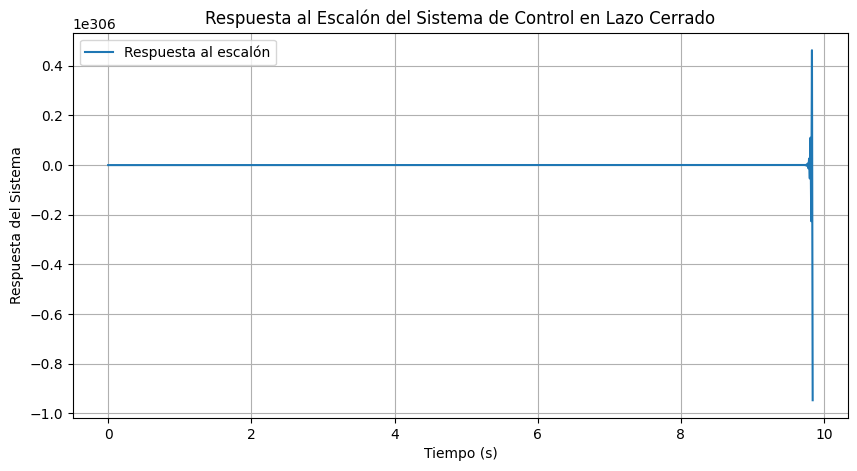

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_response(K, tau, Kp, Ki, Kd, T_final, dt):
    # Tiempo de simulación
    t = np.arange(0, T_final, dt)

    # Respuesta del sistema
    y = np.zeros(len(t))
    e = np.zeros(len(t))
    integral = 0
    derivative = 0
    u = 0

    # Entrada de escalón
    step = np.ones(len(t))

    for i in range(1, len(t)):
        # Error
        e[i] = step[i] - y[i-1]

        # PID Controller
        integral += e[i] * dt
        derivative = (e[i] - e[i-1]) / dt
        u = Kp * e[i] + Ki * integral + Kd * derivative

        # Modelo del sistema (Euler)
        y[i] = y[i-1] + dt * ((K * u - y[i-1]) / tau)

    return t, y

# Parámetros del sistema
K = 2.0
tau = 1.0

# Parámetros del controlador PID
Kp = 3.0
Ki = 0.1
Kd = 1.0

# Simulación
t, y = step_response(K, tau, Kp, Ki, Kd, T_final=10, dt=0.01)

# Graficar la respuesta
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Respuesta al escalón')
plt.title('Respuesta al Escalón del Sistema de Control en Lazo Cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta del Sistema')
plt.grid(True)
plt.legend()
plt.show()


4. Análisis de los Resultados  
Este código simula la respuesta al escalón de un sistema controlado por un controlador PID. Puedes variar los parámetros
𝐾
𝑝
K
p
​
 ,
𝐾
𝑖
K
i
​
 , y
𝐾
𝑑
K
d
​
  para ver cómo afectan la estabilidad, el tiempo de establecimiento, el sobrepaso y el error en estado estacionario del sistema.

* Aumentar
𝐾
𝑝
​
 puede reducir el tiempo de establecimiento pero también puede aumentar el sobrepaso.  
* Aumentar
𝐾
𝑖
​
  ayuda a eliminar el error en estado estacionario pero puede introducir oscilaciones si es demasiado alto.  
* 𝐾
𝑑
​
  ayuda a mejorar la respuesta transitoria y reducir el sobrepaso.